In [6]:
#colorado_data - confirmed cases- weekly
#colorado_data1 - deaths in colorado - weekly
#date_confirmed - dataset with date and #Confirmed cases
#date_confirmed_Colorado - confirmed in colorado
#colorado_data - deaths

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from datetime import datetime
import datetime
import operator 
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from numpy.linalg import inv

%matplotlib inline

In [8]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')


In [9]:
denver_crime = pd.read_csv('crime.csv')
offense_codes = pd.read_csv('offense_codes.csv')

In [10]:
confirmed_df.head()
data=confirmed_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3'], axis=1)
data

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,...,145,145,145,145,149,149,151,151,151,151
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,...,14,14,14,14,15,15,15,16,16,19
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,...,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,...,66,66,66,66,66,66,68,68,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Central Utah,Utah,US,0,0,0,0,0,0,0,...,23,24,25,25,26,27,27,27,28,28
3257,Southeast Utah,Utah,US,0,0,0,0,0,0,0,...,15,11,11,12,12,12,13,13,13,14
3258,Southwest Utah,Utah,US,0,0,0,0,0,0,0,...,103,111,119,121,128,132,138,155,164,170
3259,TriCounty,Utah,US,0,0,0,0,0,0,0,...,13,14,14,14,14,14,14,16,16,16


In [11]:
colorado_data = data.loc[data['Province_State'] == 'Colorado']
colorado_data


,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,...,1730,1780,1815,1883,1952,2046,2117,2205,2242,2278
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,...,11,12,14,14,22,25,25,25,25,32
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,...,2625,2706,2758,2883,2977,3089,3148,3228,3272,3313
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,Baca,Colorado,US,0,0,0,0,0,0,0,...,10,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,...,8,8,8,9,9,9,9,9,9,9
311,Weld,Colorado,US,0,0,0,0,0,0,0,...,1836,1872,1897,1955,1988,2042,2087,2120,2139,2159
312,Yuma,Colorado,US,0,0,0,0,0,0,0,...,8,9,9,9,9,10,10,10,11,11
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_df = colorado_data[['Admin2','Province_State','5/7/20']]
data_df
data_df.set_index('Admin2', inplace=True)


In [13]:
data1=deaths_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3','Population'], axis=1)
data1

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,...,95,97,97,99,99,102,107,108,111,113
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Central Utah,Utah,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3257,Southeast Utah,Utah,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3258,Southwest Utah,Utah,US,0,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,3
3259,TriCounty,Utah,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
colorado_data1 = data1.loc[data['Province_State'] == 'Colorado']
colorado_data1

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,...,68,68,68,72,75,78,80,81,81,81
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,...,153,156,157,165,167,172,177,176,176,179
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Baca,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,Weld,Colorado,US,0,0,0,0,0,0,0,...,100,100,102,107,109,113,113,113,113,114
312,Yuma,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1


In [15]:
data_df1 = colorado_data1[['Admin2','Province_State','5/7/20']]
data_df1
data_df1.set_index('Admin2', inplace=True)

In [16]:
result = pd.merge(data_df, data_df1, on='Admin2')
result1 = result.drop(['Province_State_x'],axis=1)
result2 = result1.rename(columns={"5/7/20_x": "Confirmed", "5/7/20_y": "Deaths", "Province_State_y": "State"})
result2

,Confirmed,State,Deaths
Admin2,,,
Adams,2046,Colorado,78
Alamosa,25,Colorado,2
Arapahoe,3089,Colorado,172
Archuleta,8,Colorado,0
Baca,12,Colorado,0
...,...,...,...
Washington,9,Colorado,0
Weld,2042,Colorado,113
Yuma,10,Colorado,0


Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of confirmed COVID19 Cases')

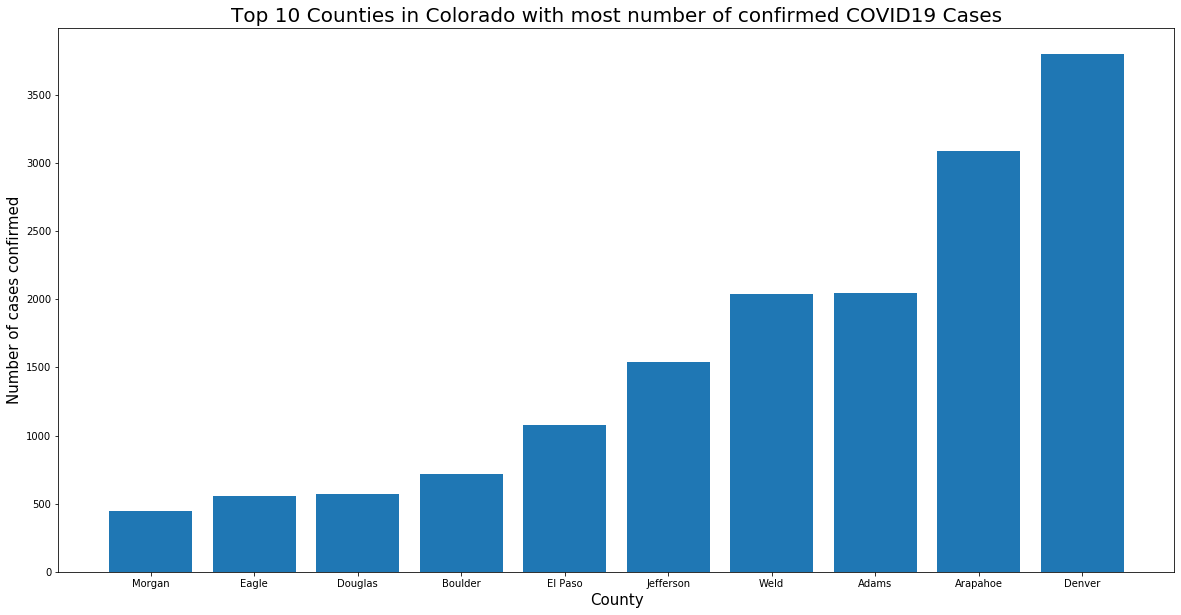

In [17]:
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Confirmed')["Confirmed"].index[-10:],result2.sort_values('Confirmed')["Confirmed"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of cases confirmed",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of confirmed COVID19 Cases",fontsize=20)

Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of COVID19 death Cases')

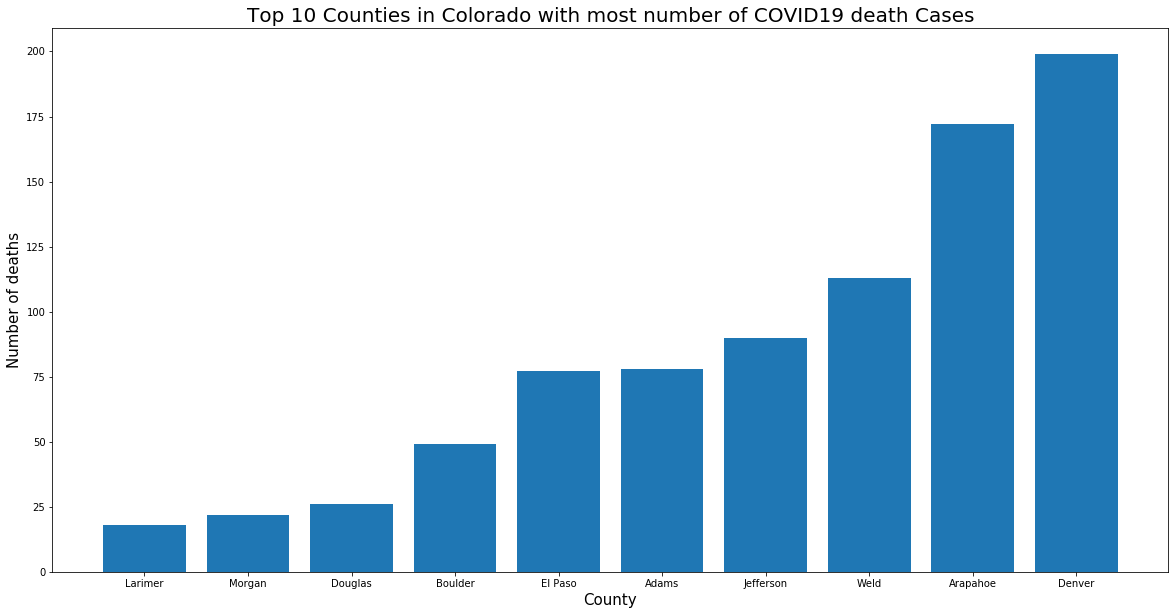

In [18]:
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Deaths')["Deaths"].index[-10:],result2.sort_values('Deaths')["Deaths"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of deaths",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of COVID19 death Cases",fontsize=20)

In [19]:
denver_crime=denver_crime.dropna(subset=['GEO_LAT','GEO_LON'])
denver_crime.isnull().sum()


INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      326315
REPORTED_DATE                  0
INCIDENT_ADDRESS           41065
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [20]:
denver_crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,4/12/2020 6:52:00 PM,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,3168520.0,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,4/8/2020 7:00:00 AM,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,3145106.0,1708264.0,-104.983742,39.776860,1,112,globeville,1,0
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,4/11/2020 7:26:00 PM,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,3183651.0,1709929.0,-104.846569,39.780749,5,521,montbello,1,0
480283,2020220574,2020220574091200,912,0,homicide-other,murder,4/11/2020 7:58:00 PM,NaN,4/11/2020 9:22:00 PM,NaN,3128353.0,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0


In [21]:
denver_crime.OFFENSE_CATEGORY_ID.unique()

array(['larceny', 'traffic-accident', 'all-other-crimes',
       'public-disorder', 'theft-from-motor-vehicle', 'burglary',
       'other-crimes-against-persons', 'drug-alcohol',
       'white-collar-crime', 'auto-theft', 'robbery',
       'aggravated-assault', 'murder', 'arson'], dtype=object)

In [22]:
offense_codes.OFFENSE_CATEGORY_ID.unique()


array(['all-other-crimes', 'public-disorder', 'drug-alcohol',
       'sexual-assault', 'other-crimes-against-persons',
       'white-collar-crime', 'traffic-accident', 'murder', 'robbery',
       'aggravated-assault', 'arson', 'burglary', 'larceny',
       'theft-from-motor-vehicle', 'auto-theft'], dtype=object)

In [23]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                124198
all-other-crimes                 85969
larceny                          48577
public-disorder                  48483
theft-from-motor-vehicle         38639
drug-alcohol                     30253
auto-theft                       27116
other-crimes-against-persons     23696
burglary                         23388
aggravated-assault               11916
white-collar-crime                6748
robbery                           6257
arson                              569
murder                             312
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [24]:
denver_crime.dtypes

INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                     float64
GEO_Y                     float64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                 int64
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

In [25]:
denver_crime.FIRST_OCCURRENCE_DATE = pd.to_datetime(denver_crime.FIRST_OCCURRENCE_DATE)
denver_crime["YEAR"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.year
#df["DAY"] = df.FIRST_OCCURRENCE_DATE.dt.day
#df["DAY_OF_WEEK"] = df.FIRST_OCCURRENCE_DATE.dt.dayofweek
denver_crime["MONTH"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.month
#df["HOUR"] = df.FIRST_OCCURRENCE_DATE.dt.hour
denver_crime


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
0,2018869789,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,...,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0,2018,12
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,2015-11-13 07:45:00,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,...,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1,2015,11
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,...,1699792.0,-104.999264,39.753669,6,612,union-station,1,0,2017,6
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,...,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0,2019,12
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,...,1716158.0,-104.828868,39.797750,5,521,montbello,1,0,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [26]:
denver_crime = denver_crime[denver_crime.YEAR != 2018]
denver_crime = denver_crime[denver_crime.YEAR != 2017]
denver_crime = denver_crime[denver_crime.YEAR != 2016]
denver_crime = denver_crime[denver_crime.YEAR != 2015]
denver_crime = denver_crime[denver_crime.YEAR != 2019]
denver_crime



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [27]:
data_after_april = denver_crime.copy()
data_after_april = data_after_april[data_after_april.MONTH != 1]
data_after_april = data_after_april[data_after_april.MONTH != 2]
data_after_april = data_after_april[data_after_april.MONTH != 3]

data_after_april



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
455524,2020209855,2020209855230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-04-06 18:00:00,4/7/2020 3:30:00 AM,4/7/2020 4:06:00 AM,5100 BLK W ALASKA PL,...,1683399.0,-105.052611,39.708881,4,412,westwood,1,0,2020,4
455623,2020203412,2020203412570700,5707,0,criminal-trespassing,all-other-crimes,2020-04-04 02:01:00,NaN,4/4/2020 5:09:00 AM,150 W 9TH AVE,...,1690969.0,-104.989805,39.729407,6,611,civic-center,1,0,2020,4
456227,2020208240,2020208240120500,1205,0,robbery-street,robbery,2020-04-06 11:30:00,NaN,4/6/2020 11:35:00 AM,3390 W ALAMEDA AVE,...,1684184.0,-105.031111,39.710952,4,412,westwood,1,0,2020,4
457484,2020215694,2020215694544100,5441,0,traffic-accident,traffic-accident,2020-04-09 16:29:00,NaN,4/9/2020 5:42:00 PM,300 BLOCK S KALAMATH ST,...,1683921.0,-104.997438,39.710091,3,312,baker,0,1,2020,4
458807,2020207478,2020207478239900,2399,0,theft-other,larceny,2020-04-06 00:42:00,NaN,4/6/2020 1:31:00 AM,1690 N PEARL ST,...,1695943.0,-104.979603,39.743017,6,621,north-capitol-hill,1,0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [28]:
#Addition test
data_after_april_test = denver_crime.copy()
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 1]
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 2]


data_after_april_test

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
1149,2020137723,2020137723544100,5441,0,traffic-accident,traffic-accident,2020-03-03 13:50:00,NaN,3/3/2020 3:31:00 PM,W ALAMEDA AVE / S CLAY ST,...,1684278.0,-105.020336,39.711167,4,412,athmar-park,0,1,2020,3
2790,2020132689,2020132689260401,2604,1,fraud-criminal-impersonation,white-collar-crime,2020-03-01 03:20:00,NaN,3/1/2020 4:50:00 AM,1600 BLK N BROADWAY ST,...,1695752.0,-104.987860,39.742529,6,611,cbd,1,0,2020,3
2984,2020137637,2020137637357200,3572,0,drug-methampetamine-possess,drug-alcohol,2020-03-03 13:48:00,NaN,3/3/2020 2:23:00 PM,17TH ST / CHESTNUT PL,...,1700178.0,-105.002407,39.754742,6,612,union-station,1,0,2020,3
5207,2020135919,2020135919230300,2303,0,theft-shoplift,larceny,2020-03-02 17:27:00,NaN,3/2/2020 5:56:00 PM,2950 W EVANS AVE,...,1672276.0,-105.023673,39.678231,4,422,college-view-south-platte,1,0,2020,3
5281,2020138616,2020138616570700,5707,0,criminal-trespassing,all-other-crimes,2020-03-03 21:22:00,NaN,3/3/2020 11:08:00 PM,1576 N SHERMAN ST,...,1695365.0,-104.984490,39.741452,6,621,north-capitol-hill,1,0,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


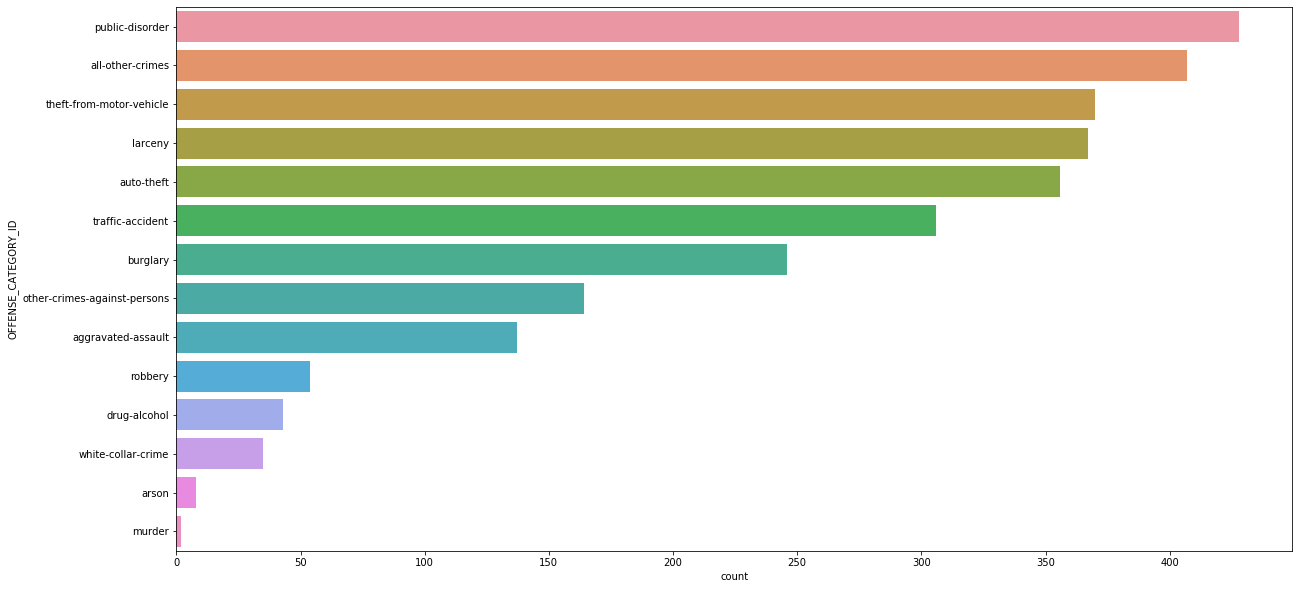

In [29]:
plt.figure(figsize=(20,10))
category_frequency1 = data_after_april.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=data_after_april, order=category_frequency1.index)

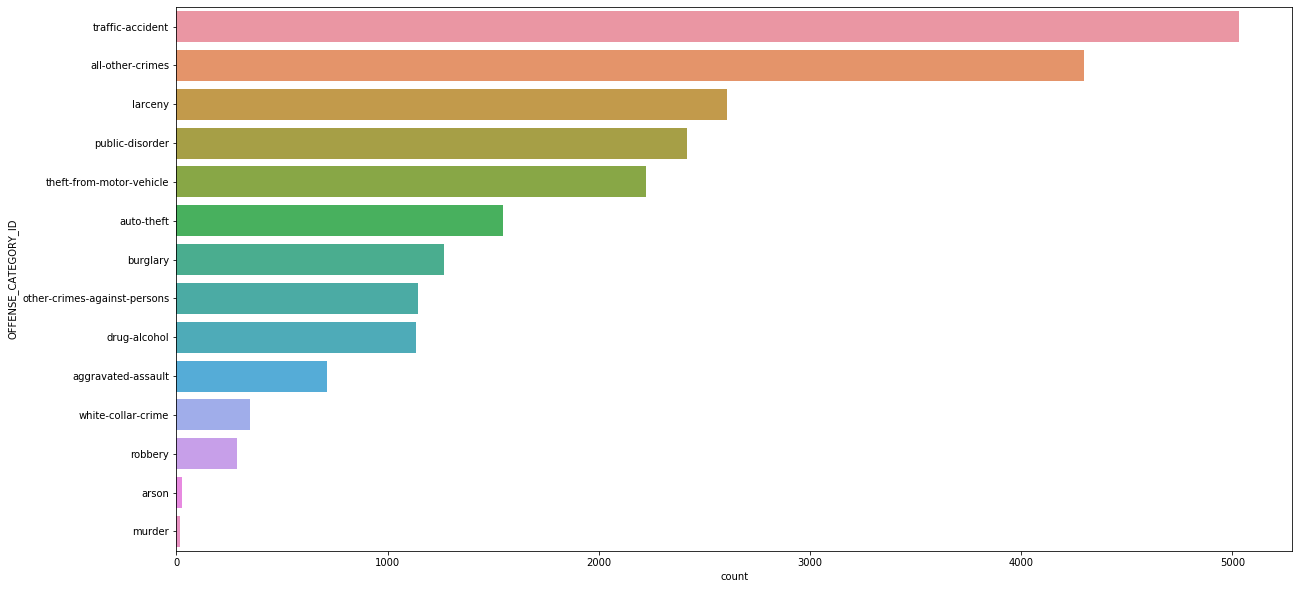

In [30]:
plt.figure(figsize=(20,10))
category_frequency = denver_crime.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=denver_crime, order=category_frequency.index)

In [31]:
is_crime = denver_crime[denver_crime.IS_CRIME==1]
is_traffic = denver_crime[denver_crime.IS_TRAFFIC==1]


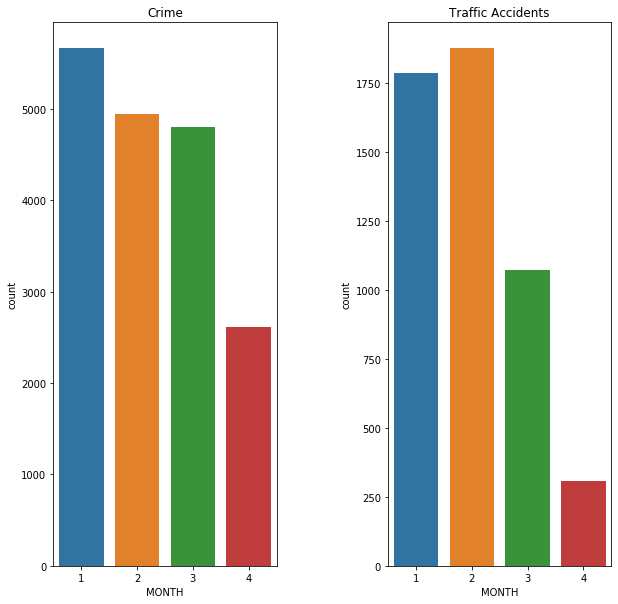

In [32]:
x, axes = plt.subplots(1,2)
x.set_figheight(10)
x.set_figwidth(10)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="MONTH", data=is_crime,ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="MONTH", data=is_traffic,ax=axes[1])

In [33]:
pearsoncorr = denver_crime.corr(method='pearson')

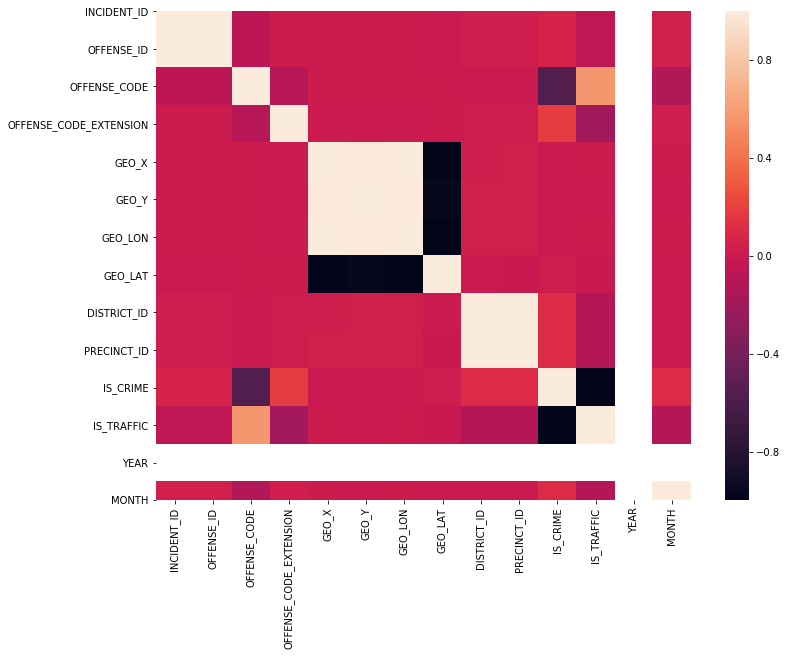

In [34]:
plt.figure(figsize=(12, 9))
sns.heatmap(pearsoncorr)

In [35]:
denver_crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1


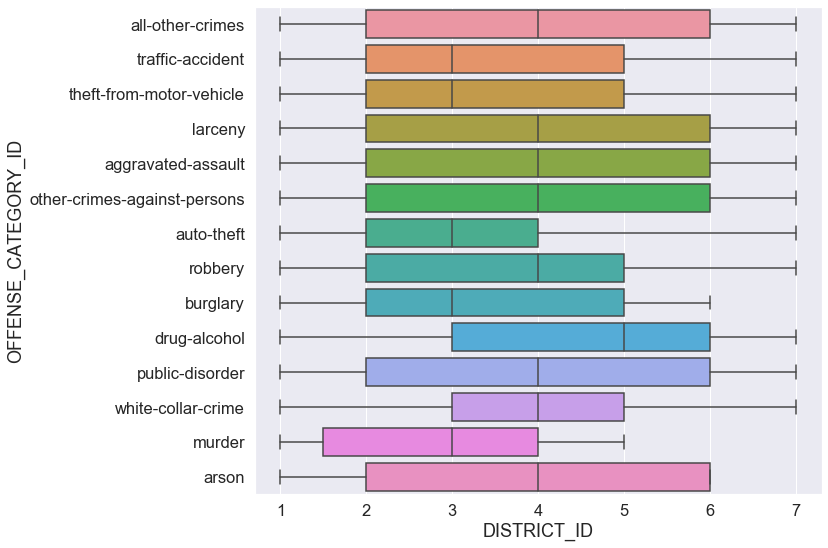

In [36]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); sns.boxplot(x='DISTRICT_ID', y='OFFENSE_CATEGORY_ID', data=denver_crime[['DISTRICT_ID', 'OFFENSE_CATEGORY_ID']])
plt.tight_layout()
plt.show()

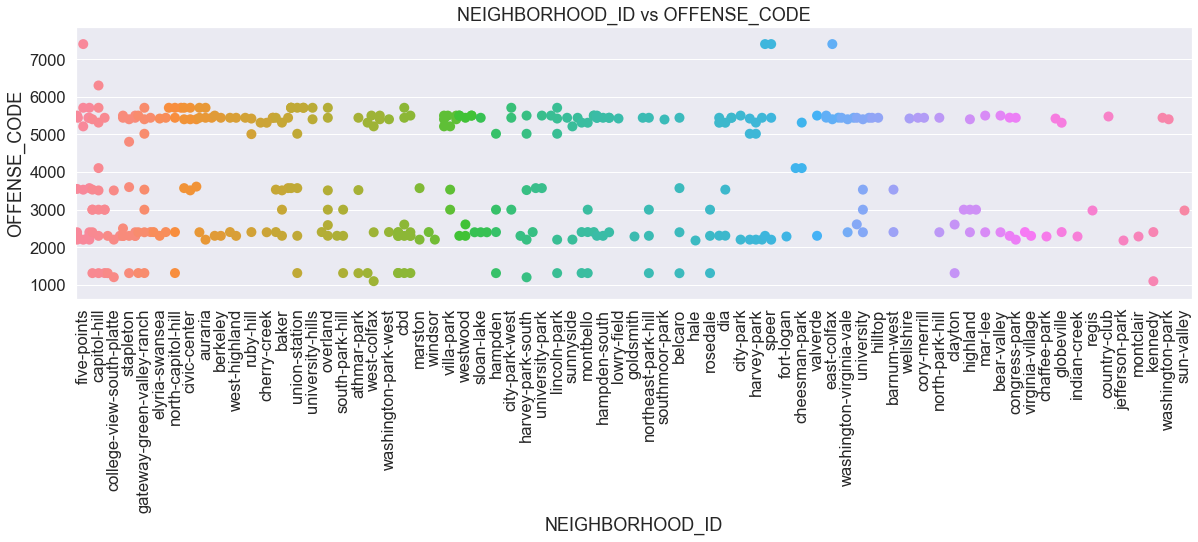

In [37]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x='NEIGHBORHOOD_ID', y='OFFENSE_CODE', data=denver_crime.head(350), size =10)
plt.xticks(rotation=90)
plt.title('NEIGHBORHOOD_ID vs OFFENSE_CODE')
plt.show()

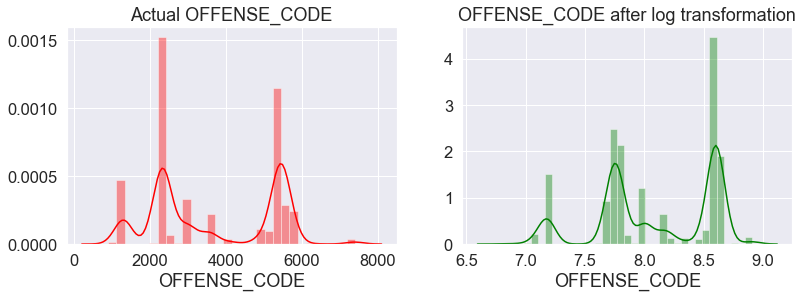

In [38]:
figure = plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
sns.distplot(denver_crime.OFFENSE_CODE, color = 'red')
plt.title('Actual OFFENSE_CODE')
plt.subplot(1,2,2)
sns.distplot(np.log(denver_crime.OFFENSE_CODE), color = 'green')
plt.title('OFFENSE_CODE after log transformation')
plt.show()

In [39]:
########################################################################
############################inference1##################################
#Addition test
colorado_data.drop('Province_State',axis=1,inplace= True)
colorado_data.drop('Country_Region',axis=1,inplace=True)
colorado_data1.drop('Province_State',axis=1,inplace= True)
colorado_data1.drop('Country_Region',axis=1,inplace=True)

C:\Users\Aishu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


,Date,Confirmed Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
106,5/7/20,18370
107,5/8/20,18827
108,5/9/20,19375
109,5/10/20,19703


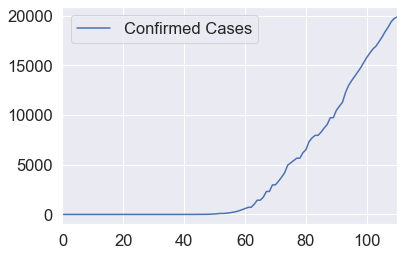

In [40]:

df1=colorado_data.sum()
df= df1.T
df=df[1:]
df.to_csv("date_confirmed.csv")
total_df= pd.read_csv("date_confirmed.csv",sep=",",names=['Date','Confirmed Cases'])
total_df.plot()
date_confirmed= total_df
date_confirmed
#change date format




In [41]:
#Addition test
df_2=colorado_data1.sum()
df_3= df_2.T
df_3=df_3[1:]
df_3.to_csv("date_deaths.csv")
total_df_2= pd.read_csv("date_deaths.csv",sep=",",names=['Date','Deaths'])
date_deaths= total_df_2
date_deaths

#change date format





C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,Date,Deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
106,5/7/20,944
107,5/8/20,960
108,5/9/20,967
109,5/10/20,971


In [42]:
colorado_data1


,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,0,0,0,0,0,0,0,0,0,...,68,68,68,72,75,78,80,81,81,81
250,Alamosa,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,0,0,0,0,0,0,0,0,0,...,153,156,157,165,167,172,177,176,176,179
252,Archuleta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Baca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,Weld,0,0,0,0,0,0,0,0,0,...,100,100,102,107,109,113,113,113,113,114
312,Yuma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1


In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
total_df['Date']=pd.to_datetime(total_df['Date'])
total_df.set_index('Date', inplace=True)


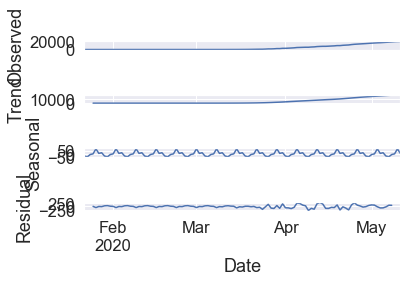

In [44]:
decomposed = seasonal_decompose(total_df['Confirmed Cases'], model='additive')
x =decomposed.plot()

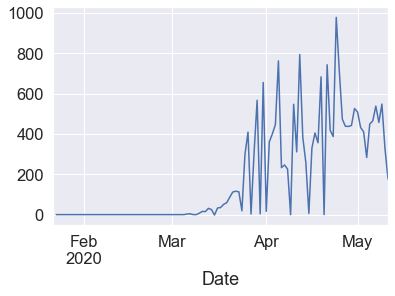

In [45]:
total_df['stationary']=total_df['Confirmed Cases'].diff()
total_df['stationary'].plot()

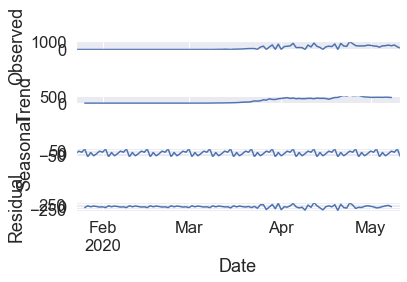

In [46]:
decomposed = seasonal_decompose(total_df['stationary'].dropna(), model='additive')
x =decomposed.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


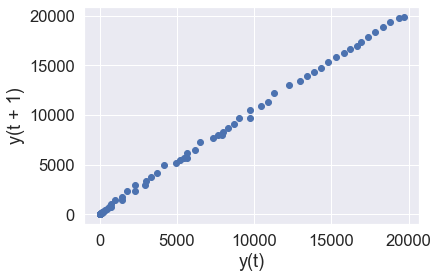

In [47]:
pd.plotting.lag_plot(total_df['Confirmed Cases'])

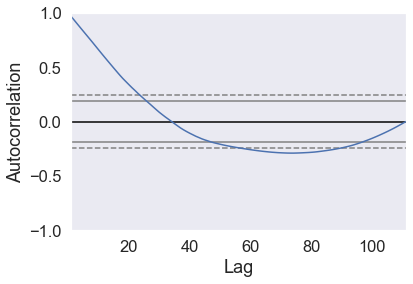

In [48]:
pd.plotting.autocorrelation_plot(total_df['Confirmed Cases'])

In [49]:
tdf=total_df.tail(29)

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
X = tdf['stationary'].dropna()

train_data = X[:22]
test_data = X[X[22:]]

len(test_data)

7

In [50]:
#need to calculate MAPE
#MSE
#EWMA CALCULATION
#CHECK HOW TO SET P VALUE FOR AR
#DO AR
#WHAT IS EWMA?

In [51]:
#inference 2
import numpy as np
import math
last2weeks=date_confirmed.tail(14)
seclast_week =last2weeks.head(7)
last_week= last2weeks.tail(7)
X_mean = last_week["Confirmed Cases"].mean(axis=0)
mean_o = seclast_week['Confirmed Cases'].mean(axis=0)
std_dev= date_confirmed["Confirmed Cases"].std(axis=0)
nroot =math.sqrt(len(date_confirmed))
Z= (X_mean - mean_o)/ (std_dev/nroot)
threshold= 1.96

#ONE SAMPLE Z TEST
if(abs(Z)> threshold):
    print("Ho is rejected with absolute value of Z  as",abs(Z))
else:
    print("Ho is accepted with absolute value of Z  as",abs(Z))

    


Ho is rejected with absolute value of Z  as 5.22645537552176


In [52]:
#TWO SAMPLED T TEST

#paired
D=[]
weekSL= seclast_week['Confirmed Cases']. values. tolist()
weekL= last_week['Confirmed Cases']. values. tolist()
for i in range(len(weekSL)):
    D.append(weekL[i]-weekSL[i])
Dmean= (sum(D)/len(D))
T= Dmean/(std_dev/math.sqrt(len(D)))

if(abs(T)> threshold):
    print("Ho is rejected with absolute value of T  as",abs(T))
else:
    print("Ho is accepted with absolute value of T  as",abs(T))


Ho is accepted with absolute value of T  as 1.3124862952394474


## 

In [53]:
#########################################INFERRENCE4(CONFIRMED CASES)##################################################
#####################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_test=date_confirmed.tail(66)
month_test=month_under_consideration_test.head(32)
month_test

,Confirmed Cases,stationary
Date,,
2020-03-07,7,4.0
2020-03-08,7,0.0
2020-03-09,7,0.0
2020-03-10,14,7.0
2020-03-11,30,16.0
2020-03-12,45,15.0
2020-03-13,76,31.0
2020-03-14,101,25.0
2020-03-15,99,-2.0


In [54]:
#Obtaining month's data from denver crime dataset

data_after_april_test['Date'] = data_after_april_test['FIRST_OCCURRENCE_DATE'].dt.date

data_after_april_test = data_after_april_test.sort_values(by="Date")
#Test = data_after_april_test.head(60)
data_after_april_test


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH,Date
365052,2020132840,2020132840549900,5499,0,traf-other,all-other-crimes,2020-03-01 06:53:00,NaN,3/1/2020 7:55:00 AM,W ALAMEDA AVE / S SANTA FE DR,...,-104.997143,39.711193,3,312,baker,1,0,2020,3,2020-03-01
362580,2020132515,2020132515549900,5499,0,traf-other,all-other-crimes,2020-03-01 01:15:00,NaN,3/1/2020 4:21:00 AM,1350 W COLFAX AVE,...,-105.004666,39.739669,1,123,lincoln-park,1,0,2020,3,2020-03-01
362579,2020132507,2020132507357200,3572,0,drug-methampetamine-possess,drug-alcohol,2020-03-01 01:11:00,NaN,3/1/2020 2:07:00 AM,W BAYAUD AVE / S YUMA ST,...,-105.013827,39.714857,4,411,valverde,1,0,2020,3,2020-03-01
362578,2020132501,2020132501549902,5499,2,vehicular-eluding-no-chase,all-other-crimes,2020-03-01 01:09:00,NaN,3/1/2020 1:46:00 AM,S BROADWAY ST / E OHIO AVE,...,-104.987530,39.702134,3,312,baker,1,0,2020,3,2020-03-01
362577,2020132489,2020132489549900,5499,0,traf-other,all-other-crimes,2020-03-01 01:00:00,NaN,3/1/2020 4:03:00 AM,E BRUCE RANDOLPH AVE / N GAYLORD ST,...,-104.960978,39.764497,2,211,cole,1,0,2020,3,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475110,2020237612,2020237612299900,2999,0,criminal-mischief-other,public-disorder,2020-04-20 01:05:00,NaN,4/20/2020 5:00:00 AM,2121 CHILDRENS MUSEUM DR,...,-105.016819,39.748982,1,123,jefferson-park,1,0,2020,4,2020-04-20
480078,2020237586,2020237586240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-20 00:00:00,4/20/2020 1:00:00 AM,4/20/2020 2:02:00 AM,2210 S DEXTER ST,...,-104.932772,39.676315,3,314,university-hills,1,0,2020,4,2020-04-20
480025,2020237551,2020237551240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-20 00:30:00,NaN,4/20/2020 3:42:00 AM,2700 BLK W 2ND AVE,...,-105.020969,39.720542,4,411,valverde,1,0,2020,4,2020-04-20
480130,2020237783,2020237783501600,5016,0,violation-of-restraining-order,all-other-crimes,2020-04-20 03:45:00,NaN,4/20/2020 4:20:00 AM,878 S DEXTER ST,...,-104.932083,39.700863,3,322,washington-virginia-vale,1,0,2020,4,2020-04-20


In [55]:
final_inference_data_test = data_after_april_test[['OFFENSE_CATEGORY_ID','Date','IS_CRIME','IS_TRAFFIC']]
final_inference_data_test

,OFFENSE_CATEGORY_ID,Date,IS_CRIME,IS_TRAFFIC
365052,all-other-crimes,2020-03-01,1,0
362580,all-other-crimes,2020-03-01,1,0
362579,drug-alcohol,2020-03-01,1,0
362578,all-other-crimes,2020-03-01,1,0
362577,all-other-crimes,2020-03-01,1,0
...,...,...,...,...
475110,public-disorder,2020-04-20,1,0
480078,auto-theft,2020-04-20,1,0
480025,auto-theft,2020-04-20,1,0
480130,all-other-crimes,2020-04-20,1,0


In [56]:
final_inference_data1_test = final_inference_data_test.loc[final_inference_data_test['OFFENSE_CATEGORY_ID'] == 'traffic-accident']
final_inference_data1_test

,OFFENSE_CATEGORY_ID,Date,IS_CRIME,IS_TRAFFIC
361716,traffic-accident,2020-03-01,0,1
339146,traffic-accident,2020-03-01,0,1
362582,traffic-accident,2020-03-01,0,1
367277,traffic-accident,2020-03-01,0,1
367270,traffic-accident,2020-03-01,0,1
...,...,...,...,...
480125,traffic-accident,2020-04-19,0,1
475333,traffic-accident,2020-04-19,0,1
476349,traffic-accident,2020-04-19,0,1
478824,traffic-accident,2020-04-19,0,1


In [57]:
group_test1 = final_inference_data1_test.groupby('Date')

df_final = group_test1.sum()

In [58]:
df_final1 = df_final.head(36)
df_final2 = df_final1.tail(32)
df_final2

,IS_CRIME,IS_TRAFFIC
Date,,
2020-03-05,0,71
2020-03-06,0,66
2020-03-07,0,43
2020-03-08,0,45
2020-03-09,0,50
2020-03-10,0,40
2020-03-11,0,49
2020-03-12,0,44
2020-03-13,0,43


In [59]:
#final_inference_data1_test_public = final_inference_data_test.loc[final_inference_data_test['OFFENSE_CATEGORY_ID'] == 'public-disorder']
#final_inference_data1_test_public

In [60]:
#group_test_public = final_inference_data1_test_public.groupby('crime_occurence_date')

#group_test_public.sum()

In [61]:
#month_test - number of confirmed cases per day bte 5 th march to 5th April
#df_final2 - number of traffic accidents happened per day btw 5th march to 5th April

In [62]:
#month_test1 = month_test.rename(columns={"Confirmed Cases": "Confirmed_cases"})
#month_test1

In [63]:
#df_final2
#df_final3 = df_final2.rename(columns={"crime_occurence_date" : "Date"},inplace=True)
#df_final2.rename(columns={"crime_occurence_date": "Date"})
df_final2

,IS_CRIME,IS_TRAFFIC
Date,,
2020-03-05,0,71
2020-03-06,0,66
2020-03-07,0,43
2020-03-08,0,45
2020-03-09,0,50
2020-03-10,0,40
2020-03-11,0,49
2020-03-12,0,44
2020-03-13,0,43


In [64]:
merged_df = pd.concat([month_test,df_final2], axis=1)
merged_df

,Confirmed Cases,stationary,IS_CRIME,IS_TRAFFIC
Date,,,,
2020-03-05,NaN,NaN,0.0,71.0
2020-03-06,NaN,NaN,0.0,66.0
2020-03-07,7.0,4.0,0.0,43.0
2020-03-08,7.0,0.0,0.0,45.0
2020-03-09,7.0,0.0,0.0,50.0
2020-03-10,14.0,7.0,0.0,40.0
2020-03-11,30.0,16.0,0.0,49.0
2020-03-12,45.0,15.0,0.0,44.0
2020-03-13,76.0,31.0,0.0,43.0


In [65]:
date_confirmed

,Confirmed Cases,stationary
Date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-05-07,18370,538.0
2020-05-08,18827,457.0
2020-05-09,19375,548.0


In [66]:
date_deaths1 = date_deaths.copy()
date_deaths2 = date_deaths1.set_index('Date', inplace=True)
date_deaths2

In [67]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_1 = merged_df["Confirmed Cases"]
column_2 = merged_df["IS_TRAFFIC"]

correlation = column_1.corr(column_2)
print(correlation)

-0.6304712681136401


In [68]:
#Pearson's correlation coeeficient by using formula
covariance = column_1.cov(column_2)
std_dev_cases= merged_df["Confirmed Cases"].std(axis=0)
std_dev_crime= merged_df["IS_TRAFFIC"].std(axis=0)
corr = covariance/(std_dev_crime*std_dev_cases)
print(corr)

-0.4192225218698202


In [69]:
##################################################INFERRENCE4(DEATHCASES)###################################################
#############################################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_deaths_test=date_deaths.tail(66)
month_deaths_test=month_under_consideration_deaths_test.head(32)
month_deaths_test

,Date,Deaths
45,3/7/20,0
46,3/8/20,0
47,3/9/20,0
48,3/10/20,0
49,3/11/20,0
50,3/12/20,0
51,3/13/20,1
52,3/14/20,0
53,3/15/20,1
54,3/16/20,1


In [70]:
########death dataset#######
month_deaths_test

,Date,Deaths
45,3/7/20,0
46,3/8/20,0
47,3/9/20,0
48,3/10/20,0
49,3/11/20,0
50,3/12/20,0
51,3/13/20,1
52,3/14/20,0
53,3/15/20,1
54,3/16/20,1


month_test

In [71]:
month_deaths_test['Date']=pd.to_datetime(month_deaths_test['Date'])
month_deaths_test.set_index('Date', inplace=True)
month_deaths_test

C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Deaths
Date,
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
2020-03-13,1
2020-03-14,0
2020-03-15,1


In [72]:
merged_deaths_df = pd.concat([month_deaths_test,df_final2], axis=1)
merged_deaths_df

,Deaths,IS_CRIME,IS_TRAFFIC
Date,,,
2020-03-05,NaN,0.0,71.0
2020-03-06,NaN,0.0,66.0
2020-03-07,0.0,0.0,43.0
2020-03-08,0.0,0.0,45.0
2020-03-09,0.0,0.0,50.0
2020-03-10,0.0,0.0,40.0
2020-03-11,0.0,0.0,49.0
2020-03-12,0.0,0.0,44.0
2020-03-13,1.0,0.0,43.0


In [73]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_3 = merged_deaths_df["Deaths"]
column_4 = merged_deaths_df["IS_TRAFFIC"]

correlation_deaths = column_3.corr(column_4)
print(correlation_deaths)

-0.5463720494077298


In [74]:
#Pearson's correlation coeeficient by using formula
covariance_deaths = column_3.cov(column_4)
std_dev_cases_deaths= merged_deaths_df["Deaths"].std(axis=0)
std_dev_crime_deaths= merged_deaths_df["IS_TRAFFIC"].std(axis=0)
corr_deaths = covariance_deaths/(std_dev_crime_deaths*std_dev_cases_deaths)
print(corr_deaths)

-0.3295333236196537


In [75]:
colorado_data

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,0,0,0,0,0,0,0,0,0,...,1730,1780,1815,1883,1952,2046,2117,2205,2242,2278
250,Alamosa,0,0,0,0,0,0,0,0,0,...,11,12,14,14,22,25,25,25,25,32
251,Arapahoe,0,0,0,0,0,0,0,0,0,...,2625,2706,2758,2883,2977,3089,3148,3228,3272,3313
252,Archuleta,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,Baca,0,0,0,0,0,0,0,0,0,...,10,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,0,0,0,0,0,0,0,0,0,...,8,8,8,9,9,9,9,9,9,9
311,Weld,0,0,0,0,0,0,0,0,0,...,1836,1872,1897,1955,1988,2042,2087,2120,2139,2159
312,Yuma,0,0,0,0,0,0,0,0,0,...,8,9,9,9,9,10,10,10,11,11
3154,Out of CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
denver_data = data.loc[data['Admin2'] == 'Denver']
denver_data

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
265,Denver,Colorado,US,0,0,0,0,0,0,0,...,3222,3345,3428,3546,3674,3799,3892,4001,4070,4118


In [77]:
#######################DENVER CONFIRMED CASES##################################
df1_denver=denver_data.sum()
df_denver= df1_denver.T
df_denver=df_denver[1:]
df_denver.to_csv("date_confirmed_denver.csv")
total_df_denver= pd.read_csv("date_confirmed_denver.csv",sep=",",names=['Date','Confirmed Cases'])
date_confirmed_denver= total_df
date_confirmed_denver
#change date format

C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,Confirmed Cases,stationary
Date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-05-07,18370,538.0
2020-05-08,18827,457.0
2020-05-09,19375,548.0


In [78]:
month_under_consideration_denver_test=date_confirmed_denver.tail(66)
month_confirmed_test_denver=month_under_consideration_denver_test.head(32)
month_confirmed_test_denver

,Confirmed Cases,stationary
Date,,
2020-03-07,7,4.0
2020-03-08,7,0.0
2020-03-09,7,0.0
2020-03-10,14,7.0
2020-03-11,30,16.0
2020-03-12,45,15.0
2020-03-13,76,31.0
2020-03-14,101,25.0
2020-03-15,99,-2.0


In [79]:
merged_confirmed_df_denver = pd.concat([month_confirmed_test_denver,df_final2], axis=1)
merged_confirmed_df_denver

,Confirmed Cases,stationary,IS_CRIME,IS_TRAFFIC
Date,,,,
2020-03-05,NaN,NaN,0.0,71.0
2020-03-06,NaN,NaN,0.0,66.0
2020-03-07,7.0,4.0,0.0,43.0
2020-03-08,7.0,0.0,0.0,45.0
2020-03-09,7.0,0.0,0.0,50.0
2020-03-10,14.0,7.0,0.0,40.0
2020-03-11,30.0,16.0,0.0,49.0
2020-03-12,45.0,15.0,0.0,44.0
2020-03-13,76.0,31.0,0.0,43.0


In [80]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_5 = merged_confirmed_df_denver["Confirmed Cases"]
column_6 = merged_confirmed_df_denver["IS_TRAFFIC"]

correlation_confirmed_denver = column_5.corr(column_6)
print(correlation_confirmed_denver)

-0.6304712681136401


In [81]:
######################DENVER DEATH CORRELATION#####################
#Addition test
df_2_denver=colorado_data1.sum()
df_3_denver= df_2_denver.T
df_3_denver=df_3_denver[1:]
df_3_denver.to_csv("date_deaths_denver.csv")
total_df_2_denver= pd.read_csv("date_deaths_denver.csv",sep=",",names=['Date','Deaths'])
date_deaths_denver= total_df_2_denver
date_deaths_denver

#change date format





C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


,Date,Deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
106,5/7/20,944
107,5/8/20,960
108,5/9/20,967
109,5/10/20,971


In [82]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)
date_deaths2_denver

In [83]:
date_deaths_denver

,Date,Deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
106,5/7/20,944
107,5/8/20,960
108,5/9/20,967
109,5/10/20,971


In [84]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)


In [85]:
month_under_consideration_denver_deaths_test=date_deaths_denver.tail(66)
month_deaths_test_denver=month_under_consideration_denver_deaths_test.head(32)
month_deaths_test_denver

,Date,Deaths
45,3/7/20,0
46,3/8/20,0
47,3/9/20,0
48,3/10/20,0
49,3/11/20,0
50,3/12/20,0
51,3/13/20,1
52,3/14/20,0
53,3/15/20,1
54,3/16/20,1


In [86]:
month_deaths_test_denver['Date']=pd.to_datetime(month_deaths_test_denver['Date'])
month_deaths_test_denver.set_index('Date', inplace=True)
month_deaths_test_denver

C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Deaths
Date,
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
2020-03-13,1
2020-03-14,0
2020-03-15,1


In [87]:
merged_deaths_df_denver = pd.concat([month_deaths_test_denver,df_final2], axis=1)
merged_deaths_df_denver

,Deaths,IS_CRIME,IS_TRAFFIC
Date,,,
2020-03-05,NaN,0.0,71.0
2020-03-06,NaN,0.0,66.0
2020-03-07,0.0,0.0,43.0
2020-03-08,0.0,0.0,45.0
2020-03-09,0.0,0.0,50.0
2020-03-10,0.0,0.0,40.0
2020-03-11,0.0,0.0,49.0
2020-03-12,0.0,0.0,44.0
2020-03-13,1.0,0.0,43.0


In [88]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_7 = merged_deaths_df_denver["Deaths"]
column_8 = merged_deaths_df_denver["IS_TRAFFIC"]

correlation_deaths_denver = column_7.corr(column_8)
print(correlation_deaths_denver)

-0.5463720494077298


In [89]:
#Pearson's correlation coeeficient by using formula
covariance_deaths_denver = column_7.cov(column_8)
std_dev_cases_deaths_denver= merged_deaths_df_denver["Deaths"].std(axis=0)
std_dev_crime_deaths_denver= merged_deaths_df_denver["IS_TRAFFIC"].std(axis=0)
corr_deaths_de = covariance_deaths/(std_dev_crime_deaths*std_dev_cases_deaths)
print(corr_deaths)

-0.3295333236196537


In [90]:
date_confirmed_denver

,Confirmed Cases,stationary
Date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-05-07,18370,538.0
2020-05-08,18827,457.0
2020-05-09,19375,548.0


In [91]:
###############inference 1#################
################EWMA#######################
denver_confirmed = date_confirmed_denver.tail(29) #last 4 weeks data 

denver_confirmed.head(5)

,Confirmed Cases,stationary
Date,,
2020-04-13,7691,384.0
2020-04-14,7950,259.0
2020-04-15,7956,6.0
2020-04-16,8286,330.0
2020-04-17,8691,405.0


In [92]:
#MAPE CALCULATION

def mapecalc(actual,pred):
    mape= np.sum(abs(np.array(actual)-np.array(pred))/actual)
    return (mape/len(actual))*100

#MSE CALCULATION

def msecalc(actual,pred):
    sse= np.sum((np.array(actual)-np.array(pred))**2)
    mse= sse/len(actual)

In [93]:
#######EMWA ALPHA=0.5 METHOD 1##################
pred_list =[]
actual_list= denver_confirmed['stationary'].tolist()
pred_list.append(actual_list[0])
alpha=0.5
for i in range(28):
    val = (alpha * actual_list[i]) + (1- alpha)* pred_list[i]
    pred_list.append(val)
    
data_tuples = list(zip(actual_list,pred_list))
EMWA= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
EMWA= EMWA.tail(7)
EMWA
mape= mapecalc(actual_list,pred_list)
print("MAPE",mape)
mse= msecalc(actual_list,pred_list)
print("MSE",mse)

MAPE inf
MSE None


C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [94]:
#####EMWA METHOD 1 - ALPHA 0.8##################
pred_list =[]
actual_list= denver_confirmed['stationary'].tolist()
pred_list.append(actual_list[0])
alpha=0.8
for i in range(28):
    val = (alpha * actual_list[i]) + (1- alpha)* pred_list[i]
    pred_list.append(val)
    
data_tuples = list(zip(actual_list,pred_list))
EMWA= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
EMWA= EMWA.tail(7)
EMWA

mape= mapecalc(actual_list,pred_list)
print("MAPE",mape)
mse= msecalc(actual_list,pred_list)
print("MSE",mse)

MAPE inf
MSE None


C:\Users\Aishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [95]:

#########EMWA METHOD 2########################
# def calcEWMA(actual_list,alpha):
#     power=0
#     w=0
#     c= 1- alpha
#     for i in range(len(actual_list)-1,-1,-1):
#         yt= actual_list[i]
#         w += yt * (c**power)
        
#         power+=1
#     return alpha * w

In [96]:
#####EMWA WITH 0.5 for the last 1 week using the previous 3 weeks################
# pred_list =[]
# actual_list= denver_confirmed['stationary'].tolist()
# actual_list=actual_list[:21] #first  21 days


# ##predict for the last week######
# for i in range(7): 
#     predval = calcEWMA(actual_list,0.5)
   
#     pred_list.append(predval)
#     actual_list.append(predval)  #adding the predicted value to the list
# actual_lastweek=denver_confirmed['stationary'].tolist()
# actual_lastweek= actual_lastweek[21:]
# data_tuples = list(zip(actual_lastweek,pred_list))
# EMWA= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
# EMWA= EMWA.tail(7)
# EMWA

In [97]:
#####EMWA WITH 0.8 for the last 1 week using the previous 3 weeks################

# pred_list =[]
# actual_list= denver_confirmed['stationary'].tolist()
# actual_list=actual_list[:21] #first  21 days
# ##predict for the last week######
# for i in range(7): 
#     predval = calcEWMA(actual_list,0.8)
   
#     pred_list.append(predval)
#     actual_list.append(predval)  #adding the predicted value to the list
# actual_lastweek=denver_confirmed['stationary'].tolist()
# actual_lastweek= actual_lastweek[21:]
# data_tuples = list(zip(actual_lastweek,pred_list))
# EMWA= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
# EMWA= EMWA.tail(7)



In [98]:
#################AR(3)########################
x = denver_confirmed['stationary']
y=[]
x0=[]
x1=[]
x2=[]

count=0
for i in range(21):
    if (0<=count<=17):
        x0.append(x[i])
    if (1<=count<=18):
        x1.append(x[i])
    if (2<=count<=19):
        x2.append(x[i])
    if (3<=count<=20):
        y.append(x[i])
    
    count+=1
    
arr1 = np.array(np.ones(18))
X = np.column_stack((arr1,np.array(x2),np.array(x1), np.array(x0)))
xt_x_inv= inv(np.dot(X_transpose,X))
beta_hat = np.dot(np.dot(xt_x_inv,X.transpose()),np.array(y))
print(beta_hat)
x0=[]
x1=[]
x2=[]
y=[]
count=0
for i in x[18:]:
    if count<7:
        x0.append(i)
    if (0<count<8):
        x1.append(i)
    if (1<count<9):
        x2.append(i)
    if (2<count<10):
        y.append(i)
    count+=1
    if count==10:
        break
arrone = np.array( np.ones(7))
X = np.column_stack((arrone,x2,x1,x0))
Y_hat = np.dot(X,beta_hat)
mape= mapecalc(y,Y_hat)
print("MAPE",mape)
mse= msecalc(y,Y_hat)
print("MSE",mse)
data_tuples = list(zip(actual_list,Y_hat))
aw3= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
aw3

NameError: name 'X_transpose' is not defined

In [ ]:
##############AR(5)##############################

x = denver_confirmed['stationary']
x0=[]
x1=[]
x2=[]
x3=[]
x4=[]
y=[]
count=0
for i in range(21):
    if (0<=count<=15):
        x0.append(x[i])
    if (1<=count<=16):
        x1.append(x[i])
    if (2<=count<=17):
        x2.append(x[i])
    if (3<=count<=18):
        x3.append(x[i])
    if( 4<=count<=19):
        x4.append(x[i])
    if (5<=count<=20):
        y.append(x[i])
    count+=1
    
arr16 = np.array(np.ones(16))

y = np.array(y)
X = np.column_stack((arr16,x4,x3,x2,x1,x0))
xt_x_inv= inv(np.dot(X.transpose(),X))
betaest= np.dot(np.dot(xt_x_inv,X.transpose()),y)

x0=[]
x1=[]
x2=[]
x3=[]
x4=[]
y=[]
count=0
for i in range(16,28):
    if (0<=count<=6):
        x0.append(x[i])
    if (1<=count<=7):
        x1.append(x[i])
    if (2<=count<=8):
        x2.append(x[i])
    if (3<=count<=9):
        x3.append(x[i])
    if (4<=count<=10):
        x4.append(x[i])
    if (5<=count<=11):
        y.append(x[i])
    count+=1
arrone = np.array(np.ones(7))
X = np.column_stack((arrone,x4,x3,x2,x1,x0))
Y_hat = np.dot(X,betaest)
mape= mapecalc(y,Y_hat)
print("MAPE",mape)
mse= msecalc(y,Y_hat)
print("MSE",mse)

data_tuples = list(zip(actual_list,Y_hat))
aw5= pd.DataFrame(data_tuples, columns=['Actual','Predicted'])
aw5

